# Film segmentation

In [16]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray

img_path = "/media/luis/TOMO/Dosepy/BQT_INCAN/Tiff/fondo001.tif"
img = iio.imread(img_path)

from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import colors

r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]

In [17]:
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1, vmax=1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [ ]:
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter3D(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
plt.show()

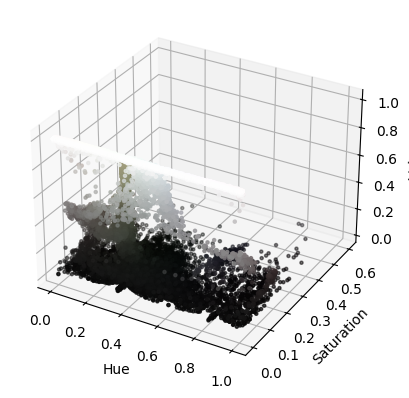

In [18]:
from skimage.color import rgb2hsv

hsv_img = rgb2hsv(img)

h = hsv_img[:,:,0]
s = hsv_img[:,:,1]
v = hsv_img[:,:,2]

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

## Segmentation based on HSV 

In [19]:
import numpy.ma as ma

mask_h = ma.masked_less(h, 0.32)
mask_s = ma.masked_less(s, 0.35)
mask_v = ma.masked_less(v, 0.75)

film = 0*np.zeros(img.shape)

film[:,:,0]=mask_h.mask
film[:,:,1]=mask_s.mask
film[:,:,2]=mask_v.mask

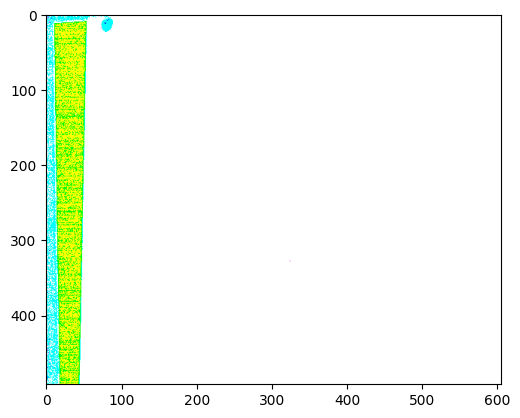

In [20]:
plt.imshow(film)

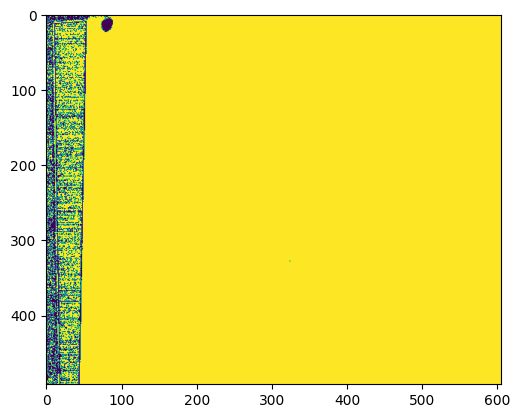

In [21]:
mask_binary = np.logical_and(film[:,:,0], film[:,:,1], film[:,:,2])
plt.imshow(mask_binary)

In [22]:
mask_binary

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

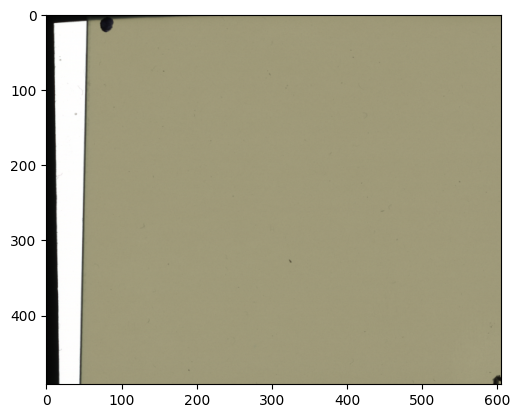

In [23]:
plt.imshow(img/np.max(img))

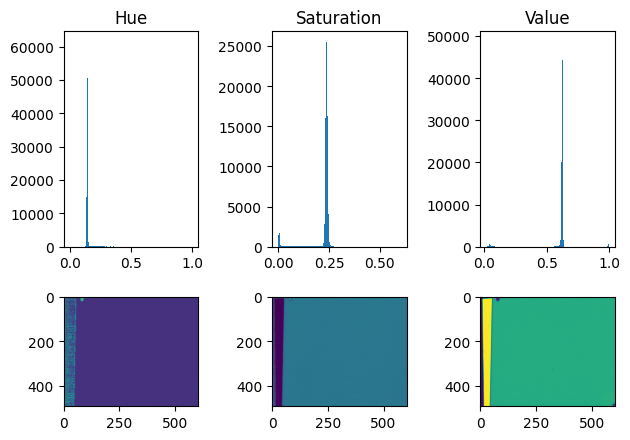

In [24]:
fig = plt.figure(tight_layout=True)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.hist(h.ravel(), 512)
ax1.set_title("Hue")
ax2.hist(s.ravel(), 512)
ax2.set_title("Saturation")
ax3.hist(v.ravel(), 512)
ax3.set_title("Value")
ax4.imshow(h)
ax5.imshow(s)
ax6.imshow(v)

In [ ]:
hue_after_thresh = np.logical_and(h > 0.05, h < 0.29)
sat_after_thresh = s > 0.1
val_after_thresh = np.logical_and(v > 0.40, v < 0.9)
binary_img = np.logical_and(hue_after_thresh, sat_after_thresh, val_after_thresh)

In [ ]:
plt.imshow(binary_img)

In [9]:
import skimage
from skimage.morphology import square
from numpy import ndarray
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
import numpy as np

In [ ]:

bi_img_filtered = skimage.morphology.binary_erosion(binary_img, mode="min", footprint=square(5))

In [ ]:
plt.imshow(bi_img_filtered)

In [ ]:
def get_labeled_films(img: ndarray, show: bool = False):
    # Convert to HSV
    hsv_img = rgb2hsv(img)
    h = hsv_img[:, :, 0]
    s = hsv_img[:, :, 1]
    v = hsv_img[:, :, 2]

    # Get binary with thresholding
    hue = np.logical_and(h > 0.05, h < 0.95)
    sat = s > 0.1
    val = np.logical_and(v > 0.10, v < 0.9)

    binary_img = np.logical_and(hue, sat, val)

    # TODO usar solo el value binary_img = v > 

    # Filter for small bright spots
    bi_img_filtered = skimage.morphology.binary_erosion(binary_img, mode="min", footprint=square(3))

    # Plot if show is True
    if show:
        fig = plt.figure(tight_layout=True)
        ax1 = fig.add_subplot(231)
        ax2 = fig.add_subplot(232)
        ax3 = fig.add_subplot(233)
        ax4 = fig.add_subplot(234)
        ax5 = fig.add_subplot(235)
        ax6 = fig.add_subplot(236)

        ax1.hist(h.ravel(), 512)
        ax1.set_title("Hue")
        ax2.hist(s.ravel(), 512)
        ax2.set_title("Saturation")
        ax3.hist(v.ravel(), 512)
        ax3.set_title("Value")
        ax4.imshow(h)
        ax5.imshow(s)
        ax6.imshow(v)

    return bi_img_filtered

# Testing the get_labeled_function

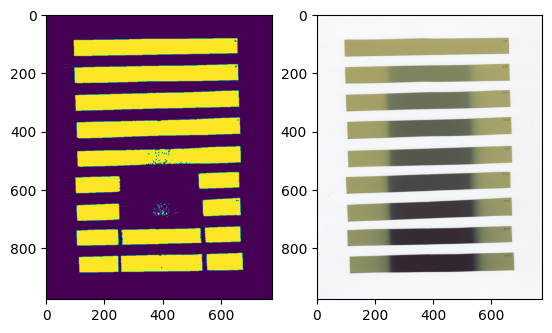

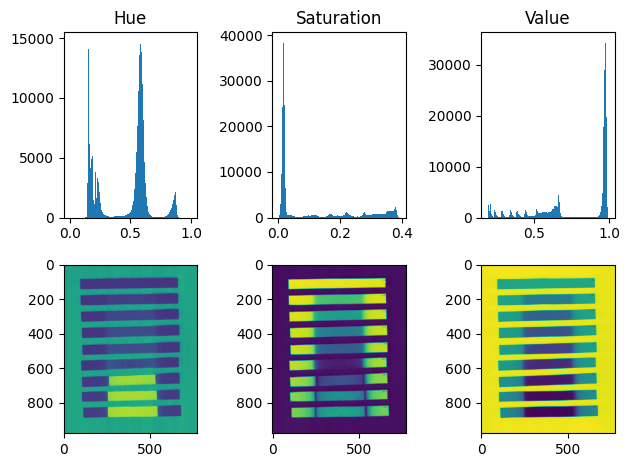

In [29]:
cal_file_path = "/home/luis/Documents/GitHub/Dosepy/docs/Jupyter/cal_48h.tif"
img = iio.imread(cal_file_path)

fig = plt.figure()
axes = fig.subplots(1, 2)

axes[0].imshow(get_labeled_films(img, show=True))
axes[1].imshow(img/np.max(img))

In [ ]:
fig = plt.figure(tight_layout=True)
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.hist(h.ravel(), 512)
ax1.set_title("Hue")
ax2.hist(s.ravel(), 512)
ax2.set_title("Saturation")
ax3.hist(v.ravel(), 512)
ax3.set_title("Value")
ax4.imshow(h)
ax5.imshow(s)
ax6.imshow(v)